# Градиентный спуск


## Теория
Последовательность $x_k$ генерируется по правилу

$$
x_{k+1} = x_k + \alpha_k h_k
$$

так что

$$
f(x_{k+1}) < f(x_k)
$$

Направление антиградиента 

$$
h = -\dfrac{f'(x)}{\|f'(x)\|_2}
$$

даёт направление **наискорейшего локального** убывания функции$~f$.

В итоге метод имеет вид

$$
x_{k+1} = x_k - \alpha f'(x_k)
$$

Теперь озаботмся выбором $\alpha$:
 Наискорейший спуск

$$
\alpha_k = \arg\min_{\alpha \geq 0} f(x_k - \alpha f'(x_k))
$$

Заметим что данная задача является одномерной и для ее решения можно воспользоваться методом золотого сечения

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:36: RuntimeWarning: overflow encountered in double_scalars


Text(0.5, 1.0, 'График зависимости времени от размерности пространства')

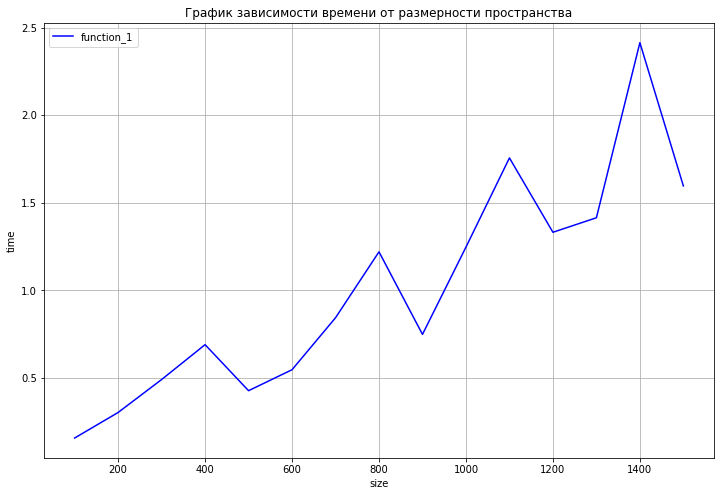

In [5]:
import matplotlib.pyplot as plt
from time import time
import sympy as sp
import numpy as np
import math as mt
import numpy.linalg as la
from scipy.optimize import minimize_scalar
from scipy.misc import derivative
%matplotlib inline

size_0 = 100 #размерность пространства
size  = size_0
e = 1e-1

iterations = 15
time1 = np.zeros(iterations)
k1 = np.zeros(iterations)
e1 = np.zeros(iterations)
k = 0

def f_1(x):
    return (mt.exp(x) - x)/10

def function_1(y):
    global size
    funct = 0
    for i in range(0, size):
        funct = funct + (i + 1) * f_1(y[i])
    return funct

#функция вычисления расстояния
def distance(y, z):
    global size
    subdistance  = 0
    for i in range(0, size):
        subdistance = subdistance + (y[i] - z[i])*(y[i] - z[i])
    distance = mt.sqrt(subdistance)
    return distance


while size < size_0 * (iterations + 1):
    gradient = np.ones(size) 
    gessian = np.zeros((size,size)) 
    invgessian = np.zeros((size,size)) 

    y = np.ones(size)
    z = np.zeros(size)
    p = np.zeros(size)

    epsilon = 0.01
    alpha = 100
    theta = 0.7
    k1[k] = 0
    begin1 = time()
    while distance(y,z) > e: #критерий остановки

        #поиск градиента
        for i in range(0, size):
            gradient[i] = (i + 1) * derivative(f_1, y[i], dx=1e-3)
        
        alpha = alpha * 0.7
        z = y
        y = y - alpha * gradient #шаг градиентного спуска
        #print(y)
        k1[k] = k1[k] + 1
        
    end1 = time()
    time1[k] = end1 - begin1
    e1[k] = 1 / e
    e = e * (0.9)
    k = k + 1
    size = size + size_0

plt.figure(figsize = (12,8))
axixx = np.arange(size_0, size_0 * (iterations + 1), size_0)
plt.plot(axixx, time1, c = 'blue', label = 'function_1')
plt.legend() 
plt.grid() 
plt.xlabel('size') 
plt.ylabel('time')
plt.title('График зависимости времени от размерности пространства')

Text(0.5, 1.0, 'График зависимости числа итераций от размерности пространства')

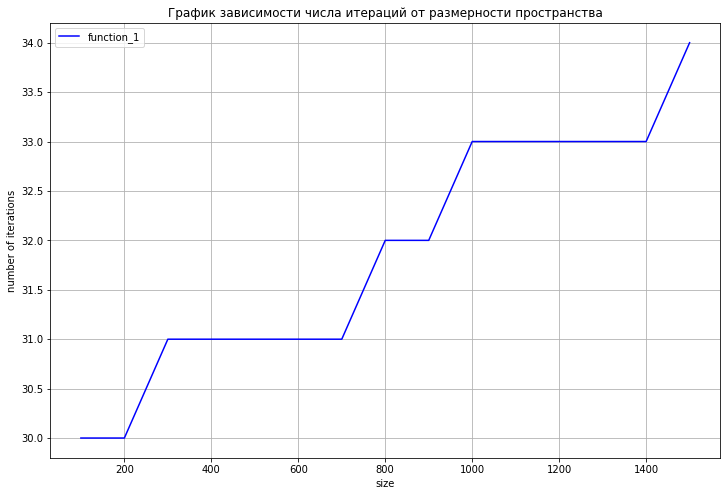

In [6]:
plt.figure(figsize = (12,8))
axixx = np.arange(size_0, size_0 * (iterations + 1), size_0)
plt.plot(axixx, k1, c = 'blue', label = 'function_1')
plt.legend() 
plt.grid() 
plt.xlabel('size') 
plt.ylabel('number of iterations')
plt.title('График зависимости числа итераций от размерности пространства')


Text(0.5, 1.0, 'График зависимости времени от обратной точности')

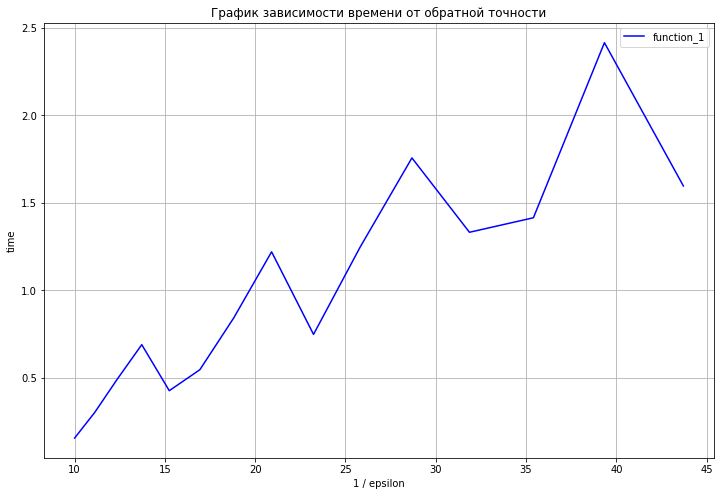

In [7]:
plt.figure(figsize = (12,8))
axixx = np.arange(size_0, size_0 * (iterations + 1), size_0)
plt.plot(e1, time1, c = 'blue', label = 'function_1')
plt.legend() 
plt.grid() 
plt.xlabel('1 / epsilon') 
plt.ylabel('time')
plt.title('График зависимости времени от обратной точности')

Text(0.5, 1.0, 'График зависимости числа итераций от обратной точности')

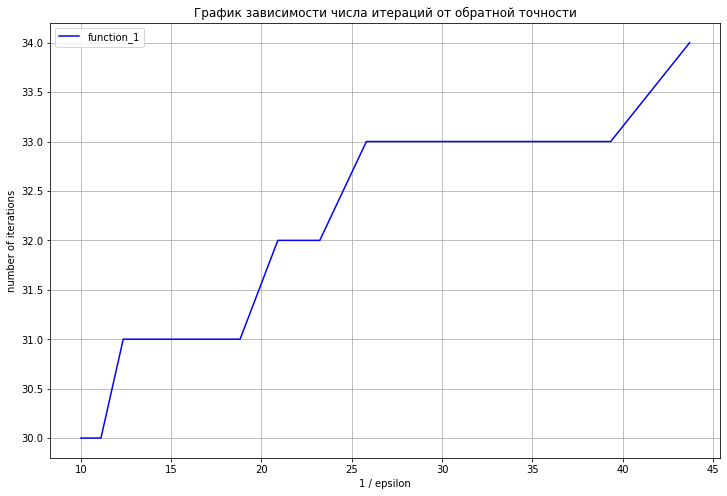

In [8]:
plt.figure(figsize = (12,8))
axixx = np.arange(size_0, size_0 * (iterations + 1), size_0)
plt.plot(e1, k1, c = 'blue', label = 'function_1')
plt.legend() 
plt.grid() 
plt.xlabel('1 / epsilon') 
plt.ylabel('number of iterations')
plt.title('График зависимости числа итераций от обратной точности')